# 14.75 problem set 1 - Max Ghenis

When written answers are required, they are provided below the question in **bold.**

In [1]:
suppressMessages({
    library(dplyr)
    library(ggplot2)
    library(AER)
    library(magrittr)
    })

## Question 1

Create data frame with 100 observations with

a) A variable `t` running from `1` to `100`

b) `alpha` which has value `3` for all 100 observations

c) Another variable `e_t`, a normal variable with mean 0 and standard deviation 1

d) `x_t` a random uniform variable over [0, 1]

In [2]:
SIZE = 100
set.seed(0)

In [3]:
df = data.frame(t=1:SIZE,
                alpha=3,
                e_t=rnorm(100),
                x_t=runif(100))

e) An outcome variable `y_t` where `beta=2`, `y_t` = `alpha + beta * x_t + e_t`.

In [4]:
BETA = 2
df = mutate(df, y_t = alpha + BETA * x_t + e_t)

f) Estimate `beta_hat`

**1.83**

In [5]:
m = lm(y_t ~ x_t, data=df)
summary(m)


Call:
lm(formula = y_t ~ x_t, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.23533 -0.60614 -0.06678  0.56760  2.50565 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.0983     0.1656  18.712  < 2e-16 ***
x_t           1.8257     0.3223   5.665 1.48e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8858 on 98 degrees of freedom
Multiple R-squared:  0.2467,	Adjusted R-squared:  0.239 
F-statistic: 32.09 on 1 and 98 DF,  p-value: 1.476e-07


f) i. Test H0: `beta = 0`

**p-value of 1.48e-7 < 0.05, so we can reject `beta=0`.**

f) ii. Test H0: `beta = 1.2`

**95% CI [1.19, 2.47] includes 1.2, so we cannot reject `beta=1.2`.**

In [6]:
confint(m)

,2.5 %,97.5 %
(Intercept),2.769741,3.426900
x_t,1.186110,2.465289


g) Create `v_t` as a random normal variable with mean 0. Generate `q_t` as `q_t = x_t + 2*x_t^3 + v_t`.

In [7]:
df %<>% mutate(v_t = rnorm(SIZE),
               q_t = x_t + 2 * x_t ^ 3 + v_t)

What is the correlation between q and x?

**0.64**

In [8]:
cor(df$q_t, df$x_t)

[1] 0.6420868

Generate outcome variable `z_t` where `beta=2`, `gamma=3`, `z_t = alpha + beta * x_t + gamma * q_t + e_t`.

In [9]:
GAMMA = 3

In [10]:
df %<>% mutate(z_t = alpha + BETA * x_t + GAMMA * q_t + e_t)

Estimate `beta_hat` from (misspecified) model:
`z_t = alpha + beta * x_t + u_t`

**11.4**

In [11]:
m = lm(z_t ~ x_t, data=df)
summary(m)


Call:
lm(formula = z_t ~ x_t, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6316 -2.4583  0.2057  2.1837  7.5694 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.6213     0.6186   2.621   0.0102 *  
x_t          11.4267     1.2041   9.490 1.55e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.309 on 98 degrees of freedom
Multiple R-squared:  0.4789,	Adjusted R-squared:  0.4736 
F-statistic: 90.06 on 1 and 98 DF,  p-value: 1.548e-15


Test H0: `beta = 2`.

**Estimated `beta` = 11.43. 95% CI = [9.04, 13.82] so we can reject `beta=2` under this misspecified model.**

In [12]:
confint(m)

,2.5 %,97.5 %
(Intercept),0.393792,2.848848
x_t,9.037274,13.816108


Discuss.

**This is the result of omitted variable bias: `z_t` is being affected by `q_t` which is correlated with `x_t` in a nonlinear way that `x_t` can't soak up alone (if it were linear we'd expect `beta_hat = beta + gamma = 5`, rather than 11.43).**

## Question 2

Use the `AssassinationsData.RData` dataset.

In [13]:
load("AssassinationsData.RData")

(a) Regress whether the institution changed from 1 year before the attempt to 1 year
after the attempt [`absnpolity2dummy11`] on whether or not the attempt was successful
[`success`]. As in the original paper, make sure this is conditional on there being a “serious attempt” [`seriousattempt`].

In [14]:
serious = filter(AssassinationsData, seriousattempt == 1)

In [15]:
m = lm(absnpolity2dummy11 ~ success, data=serious, na.action=na.omit)
summary(m)


Call:
lm(formula = absnpolity2dummy11 ~ success, data = serious, na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.15254 -0.04348 -0.04348 -0.04348  0.95652 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.04348    0.02020   2.152  0.03247 * 
success      0.10906    0.03901   2.796  0.00564 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2563 on 218 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.03462,	Adjusted R-squared:  0.03019 
F-statistic: 7.817 on 1 and 218 DF,  p-value: 0.005637


i. Interpret βb.

**When an assassination is seriously attempted, successes are associated with an additional 10.9 percent chance that institutions will change from the year before the attempt to the year after.**

ii. What assumptions do we need to interpret this as the expected difference in outcomes between when the attempt succeeds and when it fails?

**Countries where the assassination attempt failed would have experienced equal institutional change to those where it succeeded, had the attempt succeeded (and vice versa).**

iii. Why might these assumptions fail?

**Countries with successful assassination attempts might turn out differently than those where it failed for reasons other than the success of the attempt. For example, countries already on their way to institutional improvement could attract assassination attempts that are more likely to succeed (beyond the seriousness threshold applied in the paper).**

iv. Test the hypothesis that β = 0 at the 5% level. Do you reject or fail to reject the
null?

**The p-value associated with `success` is 0.00564 < 0.05, so we can reject the null that B=0.**

(b) Control for fixed effects of the type of weapon used [weapondum2, weapondum3, ...] in
the specification from (a).

In [16]:
m = lm(absnpolity2dummy11 ~ success + weapondum2 + weapondum3 + weapondum4 + 
       weapondum5 + weapondum6, data=serious, na.action=na.omit)
summary(m)


Call:
lm(formula = absnpolity2dummy11 ~ success + weapondum2 + weapondum3 + 
    weapondum4 + weapondum5 + weapondum6, data = serious, na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18306 -0.07186 -0.04732 -0.03402  0.96598 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.03402    0.02720   1.251   0.2124   
success      0.11120    0.04091   2.718   0.0071 **
weapondum2   0.03667    0.08157   0.450   0.6535   
weapondum3   0.01330    0.04358   0.305   0.7606   
weapondum4        NA         NA      NA       NA   
weapondum5   0.01358    0.07306   0.186   0.8527   
weapondum6   0.03784    0.06688   0.566   0.5721   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2584 on 214 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.03689,	Adjusted R-squared:  0.01439 
F-statistic: 1.639 on 5 and 214 DF

i. Why would you want to include these controls?

**Weapons could differ in their likelihood to successfully assassinate a leader. Controlling for it could reduce the seriousness-spectrum concern I raised above.**

ii. Does your interpretation of β change? If so, how so?

**Adding controls leaves β essentially unmoved, from 0.109 to 0.111. The interpretation becomes: When an assassination is seriously attempted *with a particular weapon type*, successes are associated with an additional 11.1 percent chance that institutions will change from the year before the attempt to the year after.**

iii. Under what assumptions can we interpret β as the expected difference in outcomes
between when the attempt succeeds and when it fails?

**Countries where the assassination attempt *with a particular weapon type* failed would have experienced equal institutional change to those where it succeeded, had the attempt succeeded (and vice versa).**

iv. Test the hypothesis that β = 0.1 at the 5% level. Do you reject or fail to reject the
null?

**Since the confidence interval of [0.03, 0.19] includes 0.1, we fail to reject the null.**

In [17]:
confint(m)

,2.5 %,97.5 %
(Intercept),-0.01958890,0.08762935
success,0.03056680,0.19182819
weapondum2,-0.12411808,0.19746037
weapondum3,-0.07260721,0.09920417
weapondum4,NA,NA
weapondum5,-0.13042193,0.15758256
weapondum6,-0.09399329,0.16967256


## Question 3: Instrumental Variables

Use the AJRData.RData dataset.

In [18]:
load('AJRData.RData')

(a) Regress the log GDP per capita in 1995 [logpgp95] on the average protection against
expropriation risk [avexpr]. In this and other problems, restrict the sample to that in
the paper [baseco should equal 1].
R Tip: For plotting, consider the package ggplot2.

In [19]:
ajr = filter(AJRData, baseco == 1)

In [20]:
m = lm(logpgp95 ~ avexpr, data=ajr)
summary(m)


Call:
lm(formula = logpgp95 ~ avexpr, data = ajr)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8715 -0.4644  0.1683  0.4610  1.1413 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.66038    0.40851  11.408  < 2e-16 ***
avexpr       0.52211    0.06119   8.533 4.72e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7132 on 62 degrees of freedom
Multiple R-squared:  0.5401,	Adjusted R-squared:  0.5327 
F-statistic: 72.82 on 1 and 62 DF,  p-value: 4.724e-12


i. Interpret βols.

**A one-point increase in the "protection against expropriation risk" score is associated with a 0.52 increase in log GDP per capita.**

ii. Is your interpretation causal? Why or why not?

**Probably not, since there could be reverse causality (richer countries have better property rights) and/or omitted variable bias (e.g. stable leadership could cause both strong economies and property rights).**

iii. Plot log GDP per capita in 95 against avexpr.

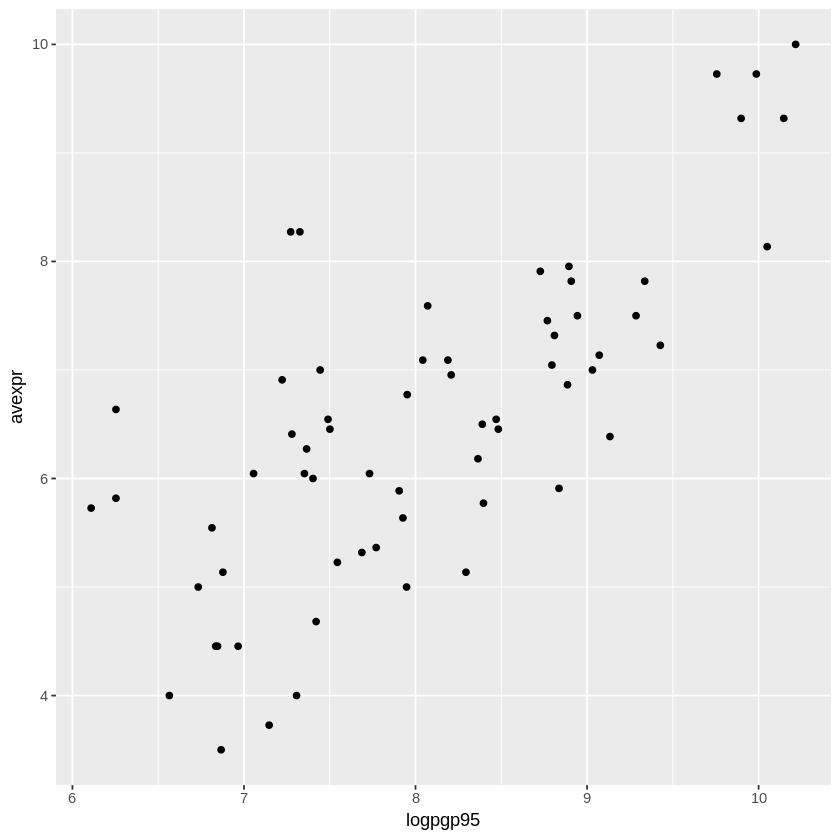

In [21]:
ggplot(ajr, aes(logpgp95, avexpr)) + geom_point()

(b) Regress the average protection against expropriation risk on settler mortality [logem4].
Call this `pi_hat`.

In [22]:
m = lm(avexpr ~ logem4, data=ajr)
summary(m)


Call:
lm(formula = avexpr ~ logem4, data = ajr)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6606 -0.9922  0.0280  0.8266  3.3566 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.3414     0.6107   15.30  < 2e-16 ***
logem4       -0.6068     0.1267   -4.79 1.08e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.265 on 62 degrees of freedom
Multiple R-squared:  0.2701,	Adjusted R-squared:  0.2584 
F-statistic: 22.95 on 1 and 62 DF,  p-value: 1.077e-05


In [23]:
pi_hat = coef(m)['logem4']
pi_hat

logem4 
-0.6067782

i. Plot avexpr against settler mortality.

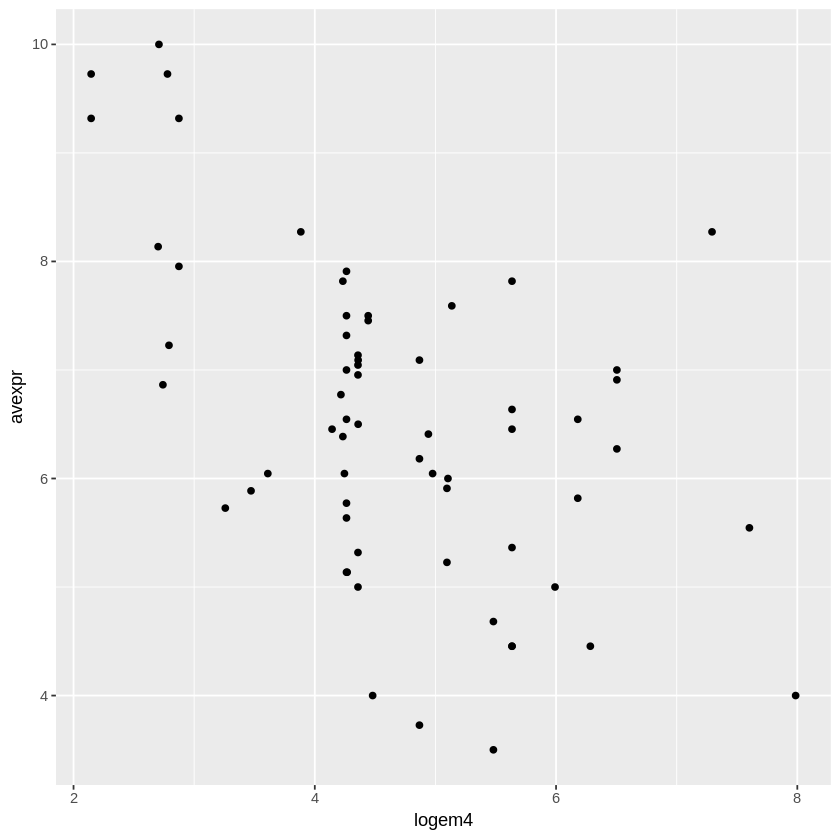

In [24]:
ggplot(ajr, aes(logem4, avexpr)) + geom_point()

ii. Interpret the relationship.

**Settler mortality has a moderate negative correlation with protection against expropriation risk; more settler deaths predicts worse property rights today.**

(c) Regress the log GDP per capita in 1995 on settler mortality. Call this `gamma_hat`.

In [25]:
m = lm(logpgp95 ~ logem4, data=ajr)
summary(m)


Call:
lm(formula = logpgp95 ~ logem4, data = ajr)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7545 -0.5386  0.1412  0.4607  1.4059 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.73057    0.36718  29.224  < 2e-16 ***
logem4      -0.57297    0.07616  -7.523 2.66e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7604 on 62 degrees of freedom
Multiple R-squared:  0.4772,	Adjusted R-squared:  0.4688 
F-statistic:  56.6 on 1 and 62 DF,  p-value: 2.659e-10


In [26]:
gamma_hat = coef(m)['logem4']
gamma_hat

logem4 
-0.5729682

i. Plot the relationship.

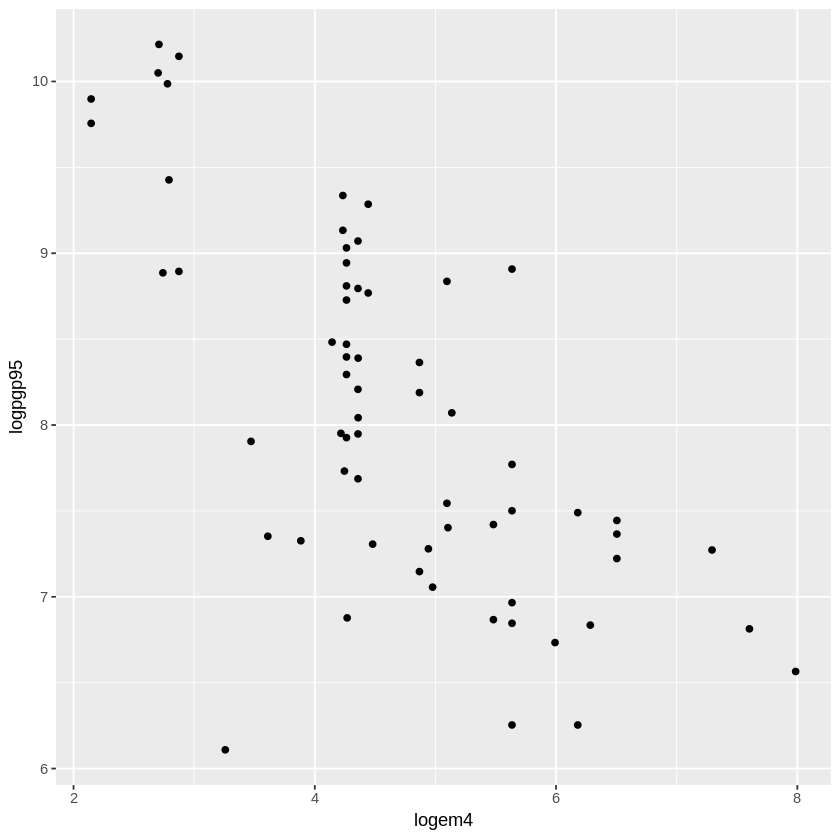

In [27]:
ggplot(ajr, aes(logem4, logpgp95)) + geom_point()

ii. Compute `gamma_hat/pi_hat`.

In [28]:
gamma_hat / pi_hat

logem4 
0.9442794

(d) Compute a 2SLS regression of log GDP per capita in 1995 on avexpr, using settler
mortality as an instrumental variable.
R Tip: For IV, try the “ivreg” command in the “AER” package.

In [29]:
m = ivreg(logpgp95 ~ avexpr | logem4, data=ajr)
summary(m)


Call:
ivreg(formula = logpgp95 ~ avexpr | logem4, data = ajr)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.44903 -0.56242  0.07311  0.69564  1.71752 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.9097     1.0267   1.860   0.0676 .  
avexpr        0.9443     0.1565   6.033  9.8e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9483 on 62 degrees of freedom
Multiple R-Squared: 0.187,	Adjusted R-squared: 0.1739 
Wald test: 36.39 on 1 and 62 DF,  p-value: 9.799e-08 


i. Interpret β2sls.

**β2sls is the effect of expropriation risk on log GDP per capita, using settler mortality as an instrument.**

ii. Compare β2sls to βols. Are they similar or different? Why do you think this is the
case?

**β2sls = 0.94, greater than βols = 0.52. This indicates that the OLS bias corrected by instrumenting on settler mortality was *negative*. That could result from reverse causality going the opposite direction of forward causality (richer countries protect property rights less) or omitted variables going the opposite direction (e.g. stable leadership improves the economy but worsens property rights).**

iii. Under what assumption can you interpret each of these causally.

**βols can be interpreted causally if the error is uncorrelated with the outcome; that is, if the error in predicting log GDP per capita from expropriation risk doesn't correlate to log GDP per capita itself. β2sls can be interpreted causally if the exclusion assumption is satisfied; that is, if settler mortality doesn't affect GDP in any way other than via expropriation risk.**

iv. Compare β2sls to γ/b. Explain, mathematically, the relationship between β2sls, π, and γ.

**β2sls = γ/π = 0.94. β2sls always equals γ/π, the reduced form coefficient divided by the first stage coefficient.**